In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("data/mushrooms.csv")
# print(df.columns)
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
X = df.drop('type', axis='columns')
y = df.type
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [6]:
enc = OneHotEncoder()
enc.fit(X)  
Xenc = enc.transform(X)
print(Xenc.shape)
feature_names = enc.get_feature_names()
print(feature_names)

(8124, 117)
['x0_bell' 'x0_conical' 'x0_convex' 'x0_flat' 'x0_knobbed' 'x0_sunken'
 'x1_fibrous' 'x1_grooves' 'x1_scaly' 'x1_smooth' 'x2_brown' 'x2_buff'
 'x2_cinnamon' 'x2_gray' 'x2_green' 'x2_pink' 'x2_purple' 'x2_red'
 'x2_white' 'x2_yellow' 'x3_no' 'x3_yes' 'x4_almond' 'x4_anise'
 'x4_creosote' 'x4_fishy' 'x4_foul' 'x4_musty' 'x4_none' 'x4_pungent'
 'x4_spicy' 'x5_attached' 'x5_free' 'x6_close' 'x6_crowded' 'x7_broad'
 'x7_narrow' 'x8_black' 'x8_brown' 'x8_buff' 'x8_chocolate' 'x8_gray'
 'x8_green' 'x8_orange' 'x8_pink' 'x8_purple' 'x8_red' 'x8_white'
 'x8_yellow' 'x9_enlarging' 'x9_tapering' 'x10_bulbous' 'x10_club'
 'x10_equal' 'x10_missing' 'x10_rooted' 'x11_fibrous' 'x11_scaly'
 'x11_silky' 'x11_smooth' 'x12_fibrous' 'x12_scaly' 'x12_silky'
 'x12_smooth' 'x13_brown' 'x13_buff' 'x13_cinnamon' 'x13_gray'
 'x13_orange' 'x13_pink' 'x13_red' 'x13_white' 'x13_yellow' 'x14_brown'
 'x14_buff' 'x14_cinnamon' 'x14_gray' 'x14_orange' 'x14_pink' 'x14_red'
 'x14_white' 'x14_yellow' 'x15_par

In [7]:
X_train, X_test, y_train, y_test = train_test_split( Xenc, y, 
                                                     stratify=y, random_state=2)


In [6]:
# Perform cross validation varying the depth of the tree. 

for d in range(2,12) :
    tree = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    print("Depth: ", d, "Validation Accuracy:", scores.mean())

Depth:  2 Validation Accuracy: 0.9555210265487203
Depth:  3 Validation Accuracy: 0.9858858980213399
Depth:  4 Validation Accuracy: 0.9921222677071168
Depth:  5 Validation Accuracy: 0.9985227063018357
Depth:  6 Validation Accuracy: 0.9998359310910583
Depth:  7 Validation Accuracy: 1.0
Depth:  8 Validation Accuracy: 1.0
Depth:  9 Validation Accuracy: 1.0
Depth:  10 Validation Accuracy: 1.0
Depth:  11 Validation Accuracy: 1.0


In [7]:

tree = DecisionTreeClassifier(max_depth=8)
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_hat = tree.predict(X_test)
print("Test Accuracy: ", tree.score(X_test, y_test))

Test Accuracy:  1.0


In [8]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[1052    0]
 [   0  979]]

TN 1052 FP 0 FN 0 TP 979


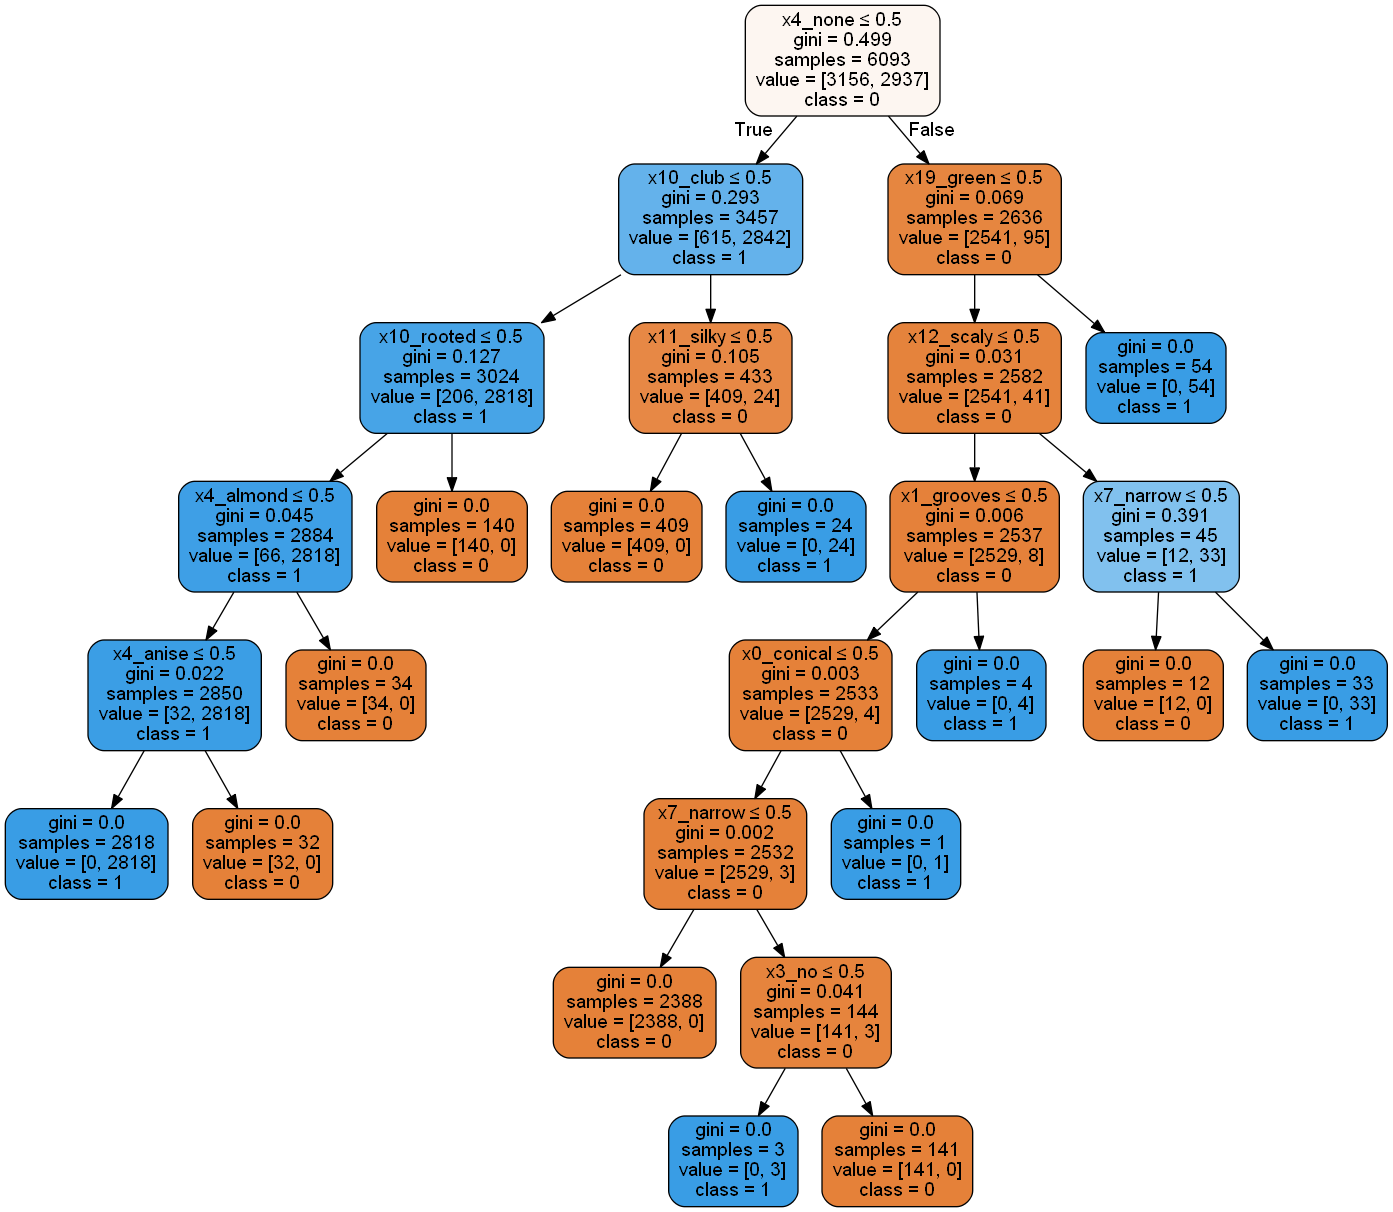

In [9]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1'],
                feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/mushrooms.png')
Image(graph.create_png())